# Preprocessing

Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
from google.colab import drive
import matplotlib.pyplot as plt

Data

In [2]:
# Assuming 'footballData' contains your dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Intro to ML/footballData.csv'
footballData = pd.DataFrame(pd.read_csv(file_path))

# Preprocessing steps...
footballData['HomeTeam'] = footballData['HomeTeam'].astype('category').cat.codes
footballData['AwayTeam'] = footballData['AwayTeam'].astype('category').cat.codes
footballData['Referee'] = footballData['Referee'].astype('category').cat.codes

# Dropping last 18 columns (Madi's Part)
footballData = footballData.iloc[:, :-18]

# Specify the columns to delete
columns_to_delete = ['Date', 'Full Time Result', 'Half Time Home Team Goals', 'Half Time Away Team Goals', 'Half Time Result']  # Replace with the column names you want to delete

# Drop the specified columns
footballData.drop(columns=columns_to_delete, inplace=True, axis=1)

# Save the modified DataFrame back to a CSV file
footballData.to_csv('modified_file.csv', index=False)  # Replace 'modified_file.csv' with your desired file name

footballData.head()

Mounted at /content/drive


,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Referee,Home Team Shots,Away Team Shots,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
0,15,0,0,2,4,10,10,2,2,16,11,3,5,1,2,0,0
1,18,24,2,2,1,9,11,3,4,7,9,4,4,2,0,0,0
2,6,1,2,0,100,7,15,3,2,18,16,5,5,3,3,0,0
3,22,44,2,1,117,12,15,4,6,13,9,6,4,2,0,0,0
4,28,30,2,0,130,23,5,10,0,9,14,11,1,0,3,0,0


Split, Standardize, Tensors

In [3]:
# Define input and target variables
x = footballData.drop(['Full Time Home Team Goals', 'Full Time Away Team Goals'], axis=1)
y = footballData[['Full Time Home Team Goals', 'Full Time Away Team Goals']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming 'x_train' contains your training data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert standardized data to PyTorch tensors
X_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)

# Convert target data to PyTorch tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


# Neural Network With Multiple Layers SGD

In [4]:
# Define a neural network for regression with multiple hidden layers
class SoccerPredictionNN3(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(SoccerPredictionNN3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define a neural network for regression with multiple hidden layers
class SoccerPredictionNN2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SoccerPredictionNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class SoccerPredictionNN1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SoccerPredictionNN1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

3 Layers
64
32
16

Epoch [10/500], Training Loss: 1.4901, Validation Loss: 1.4472
Epoch [20/500], Training Loss: 1.4389, Validation Loss: 1.3964
Epoch [30/500], Training Loss: 1.3866, Validation Loss: 1.3429
Epoch [40/500], Training Loss: 1.3278, Validation Loss: 1.2825
Epoch [50/500], Training Loss: 1.2800, Validation Loss: 1.2334
Epoch [60/500], Training Loss: 1.2494, Validation Loss: 1.2026
Epoch [70/500], Training Loss: 1.2260, Validation Loss: 1.1808
Epoch [80/500], Training Loss: 1.2068, Validation Loss: 1.1639
Epoch [90/500], Training Loss: 1.1917, Validation Loss: 1.1513
Epoch [100/500], Training Loss: 1.1803, Validation Loss: 1.1423
Epoch [110/500], Training Loss: 1.1716, Validation Loss: 1.1358
Epoch [120/500], Training Loss: 1.1646, Validation Loss: 1.1307
Epoch [130/500], Training Loss: 1.1589, Validation Loss: 1.1266
Epoch [140/500], Training Loss: 1.1540, Validation Loss: 1.1231
Epoch [150/500], Training Loss: 1.1499, Validation Loss: 1.1202
Epoch [160/500], Training Loss: 1.1462, Validatio

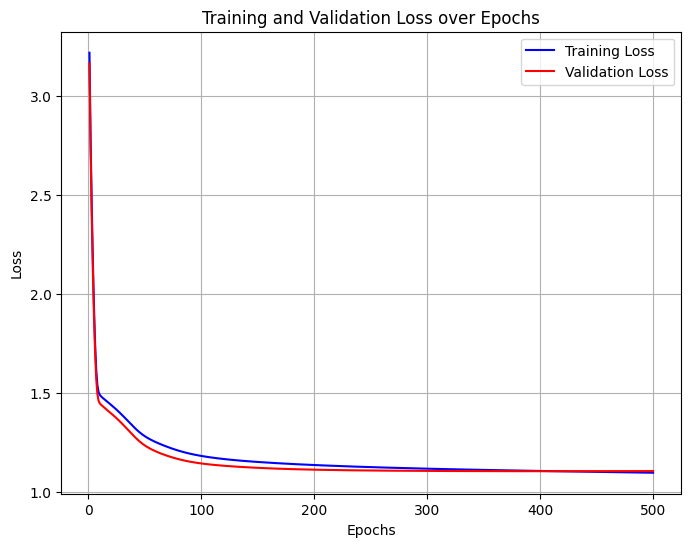

Mean Squared Error (MSE) on Test Data: 1.1040


In [5]:
# Define input and output sizes
input_size = x_train.shape[1]  # Input size based on the number of features
hidden_size1 = 64  # Number of neurons in the first hidden layer
hidden_size2 = 32  # Number of neurons in the second hidden layer
hidden_size3 = 16  # Number of neurons in the third hidden layer
output_size = 2  # Output size (two outputs for home and away goals)

# Initialize the model
model = SoccerPredictionNN3(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the neural network
num_epochs = 500
train_losses = []  # Store training losses for plotting
val_losses = []    # Store validation losses for plotting

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the training loss for each epoch
    val_losses.append(val_loss.item())  # Store the validation loss for each epoch

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Get predictions from the trained model
with torch.no_grad():
    model.eval()
    predicted_scores = model(X_test_tensor)

# Calculate Mean Squared Error (MSE)
mse = criterion(predicted_scores, y_test_tensor).item()

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")

2 Layers 64 32 0

Epoch [10/500], Training Loss: 3.0331, Validation Loss: 2.9864
Epoch [20/500], Training Loss: 2.4508, Validation Loss: 2.3997
Epoch [30/500], Training Loss: 2.0015, Validation Loss: 1.9491
Epoch [40/500], Training Loss: 1.7180, Validation Loss: 1.6683
Epoch [50/500], Training Loss: 1.5827, Validation Loss: 1.5370
Epoch [60/500], Training Loss: 1.5273, Validation Loss: 1.4851
Epoch [70/500], Training Loss: 1.5014, Validation Loss: 1.4614
Epoch [80/500], Training Loss: 1.4846, Validation Loss: 1.4457
Epoch [90/500], Training Loss: 1.4709, Validation Loss: 1.4324
Epoch [100/500], Training Loss: 1.4584, Validation Loss: 1.4201
Epoch [110/500], Training Loss: 1.4467, Validation Loss: 1.4084
Epoch [120/500], Training Loss: 1.4357, Validation Loss: 1.3973
Epoch [130/500], Training Loss: 1.4252, Validation Loss: 1.3867
Epoch [140/500], Training Loss: 1.4151, Validation Loss: 1.3764
Epoch [150/500], Training Loss: 1.4054, Validation Loss: 1.3665
Epoch [160/500], Training Loss: 1.3960, Validatio

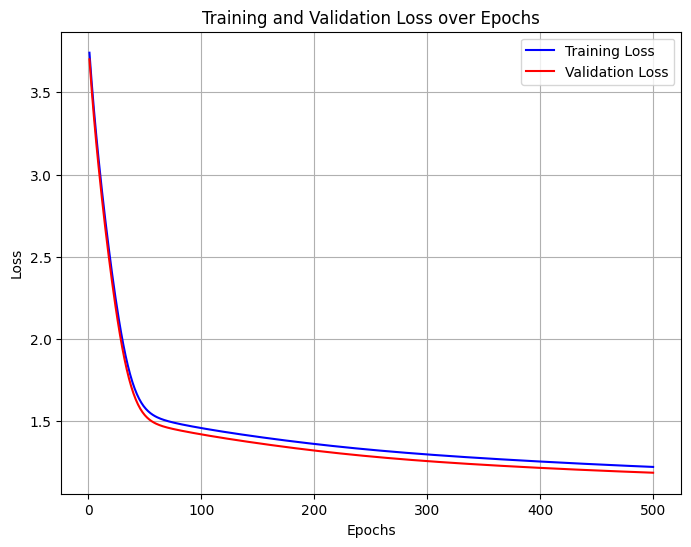

Mean Squared Error (MSE) on Test Data: 1.1867


In [6]:
# Define input and output sizes
input_size = x_train.shape[1]  # Input size based on the number of features
hidden_size1 = 64  # Number of neurons in the first hidden layer
hidden_size2 = 32  # Number of neurons in the second hidden layer
output_size = 2  # Output size (two outputs for home and away goals)

# Initialize the model
model = SoccerPredictionNN2(input_size, hidden_size1, hidden_size2, output_size)

# Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the neural network
num_epochs = 500
train_losses = []  # Store training losses for plotting
val_losses = []    # Store validation losses for plotting

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the training loss for each epoch
    val_losses.append(val_loss.item())  # Store the validation loss for each epoch

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Get predictions from the trained model
with torch.no_grad():
    model.eval()
    predicted_scores = model(X_test_tensor)

# Calculate Mean Squared Error (MSE)
mse = criterion(predicted_scores, y_test_tensor).item()

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")

1 Layers 32 0 0

Epoch [10/500], Training Loss: 2.4767, Validation Loss: 2.4202
Epoch [20/500], Training Loss: 2.0063, Validation Loss: 1.9497
Epoch [30/500], Training Loss: 1.7480, Validation Loss: 1.6930
Epoch [40/500], Training Loss: 1.6037, Validation Loss: 1.5509
Epoch [50/500], Training Loss: 1.5208, Validation Loss: 1.4700
Epoch [60/500], Training Loss: 1.4706, Validation Loss: 1.4214
Epoch [70/500], Training Loss: 1.4379, Validation Loss: 1.3898
Epoch [80/500], Training Loss: 1.4146, Validation Loss: 1.3673
Epoch [90/500], Training Loss: 1.3967, Validation Loss: 1.3499
Epoch [100/500], Training Loss: 1.3819, Validation Loss: 1.3356
Epoch [110/500], Training Loss: 1.3693, Validation Loss: 1.3232
Epoch [120/500], Training Loss: 1.3581, Validation Loss: 1.3123
Epoch [130/500], Training Loss: 1.3482, Validation Loss: 1.3025
Epoch [140/500], Training Loss: 1.3391, Validation Loss: 1.2936
Epoch [150/500], Training Loss: 1.3308, Validation Loss: 1.2854
Epoch [160/500], Training Loss: 1.3231, Validatio

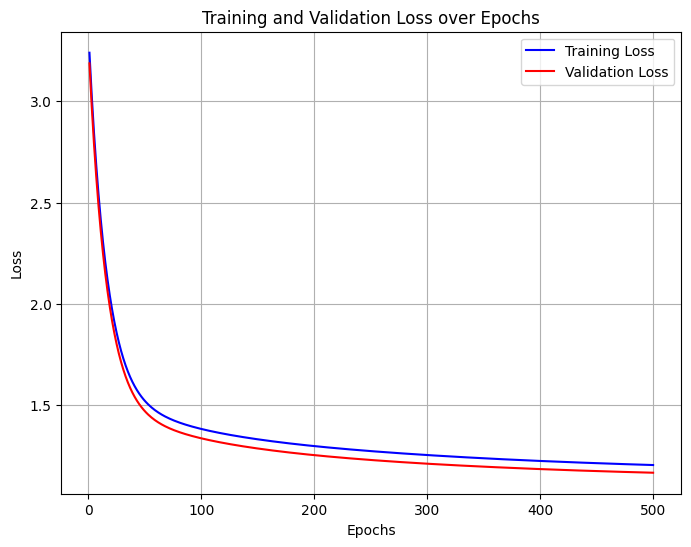

Mean Squared Error (MSE) on Test Data: 1.1656


In [7]:
# Define input and output sizes
input_size = x_train.shape[1]  # Input size based on the number of features
hidden_size1 = 32  # Number of neurons in the first hidden layer
output_size = 2  # Output size (two outputs for home and away goals)

# Initialize the model
model = SoccerPredictionNN1(input_size, hidden_size1, output_size)

# Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the neural network
num_epochs = 500
train_losses = []  # Store training losses for plotting
val_losses = []    # Store validation losses for plotting

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the training loss for each epoch
    val_losses.append(val_loss.item())  # Store the validation loss for each epoch

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Get predictions from the trained model
with torch.no_grad():
    model.eval()
    predicted_scores = model(X_test_tensor)

# Calculate Mean Squared Error (MSE)
mse = criterion(predicted_scores, y_test_tensor).item()

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")

# Neural Network With Multiple Layers ADAM

In [8]:
# Define a neural network for regression with multiple hidden layers
class SoccerPredictionNN3(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(SoccerPredictionNN3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define a neural network for regression with multiple hidden layers
class SoccerPredictionNN2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SoccerPredictionNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class SoccerPredictionNN1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SoccerPredictionNN1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

3 Layers 64 32 16

Epoch [10/500], Training Loss: 1.4792, Validation Loss: 1.4593
Epoch [20/500], Training Loss: 1.2932, Validation Loss: 1.2678
Epoch [30/500], Training Loss: 1.1982, Validation Loss: 1.1741
Epoch [40/500], Training Loss: 1.1618, Validation Loss: 1.1456
Epoch [50/500], Training Loss: 1.1404, Validation Loss: 1.1313
Epoch [60/500], Training Loss: 1.1243, Validation Loss: 1.1195
Epoch [70/500], Training Loss: 1.1112, Validation Loss: 1.1119
Epoch [80/500], Training Loss: 1.0996, Validation Loss: 1.1086
Epoch [90/500], Training Loss: 1.0894, Validation Loss: 1.1088
Epoch [100/500], Training Loss: 1.0808, Validation Loss: 1.1126
Epoch [110/500], Training Loss: 1.0729, Validation Loss: 1.1162
Epoch [120/500], Training Loss: 1.0648, Validation Loss: 1.1202
Epoch [130/500], Training Loss: 1.0562, Validation Loss: 1.1236
Epoch [140/500], Training Loss: 1.0462, Validation Loss: 1.1294
Epoch [150/500], Training Loss: 1.0358, Validation Loss: 1.1357
Epoch [160/500], Training Loss: 1.0263, Validatio

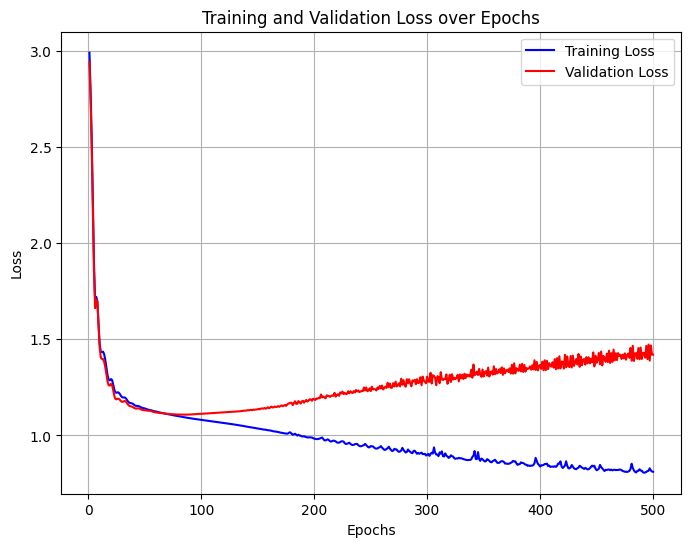

Mean Squared Error (MSE) on Test Data: 1.4374


In [9]:
# Define input and output sizes
input_size = x_train.shape[1]  # Input size based on the number of features
hidden_size1 = 64  # Number of neurons in the first hidden layer
hidden_size2 = 32  # Number of neurons in the second hidden layer
hidden_size3 = 16  # Number of neurons in the third hidden layer
output_size = 2  # Output size (two outputs for home and away goals)

# Initialize the model
model = SoccerPredictionNN3(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the neural network
num_epochs = 500
train_losses = []  # Store training losses for plotting
val_losses = []    # Store validation losses for plotting

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the training loss for each epoch
    val_losses.append(val_loss.item())  # Store the validation loss for each epoch

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Get predictions from the trained model
with torch.no_grad():
    model.eval()
    predicted_scores = model(X_test_tensor)

# Calculate Mean Squared Error (MSE)
mse = criterion(predicted_scores, y_test_tensor).item()

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")

2 Layers 64 32 0

Epoch [10/500], Training Loss: 1.5023, Validation Loss: 1.4806
Epoch [20/500], Training Loss: 1.2457, Validation Loss: 1.2177
Epoch [30/500], Training Loss: 1.2038, Validation Loss: 1.1787
Epoch [40/500], Training Loss: 1.1655, Validation Loss: 1.1465
Epoch [50/500], Training Loss: 1.1448, Validation Loss: 1.1368
Epoch [60/500], Training Loss: 1.1322, Validation Loss: 1.1259
Epoch [70/500], Training Loss: 1.1188, Validation Loss: 1.1193
Epoch [80/500], Training Loss: 1.1076, Validation Loss: 1.1166
Epoch [90/500], Training Loss: 1.0985, Validation Loss: 1.1134
Epoch [100/500], Training Loss: 1.0906, Validation Loss: 1.1136
Epoch [110/500], Training Loss: 1.0835, Validation Loss: 1.1127
Epoch [120/500], Training Loss: 1.0771, Validation Loss: 1.1128
Epoch [130/500], Training Loss: 1.0713, Validation Loss: 1.1143
Epoch [140/500], Training Loss: 1.0652, Validation Loss: 1.1162
Epoch [150/500], Training Loss: 1.0590, Validation Loss: 1.1187
Epoch [160/500], Training Loss: 1.0523, Validatio

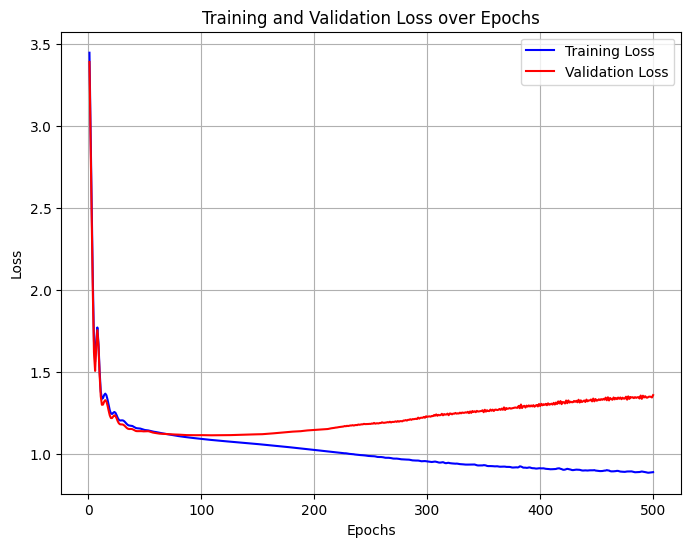

Mean Squared Error (MSE) on Test Data: 1.3432


In [10]:
# Define input and output sizes
input_size = x_train.shape[1]  # Input size based on the number of features
hidden_size1 = 64  # Number of neurons in the first hidden layer
hidden_size2 = 32  # Number of neurons in the second hidden layer
output_size = 2  # Output size (two outputs for home and away goals)

# Initialize the model
model = SoccerPredictionNN2(input_size, hidden_size1, hidden_size2, output_size)

# Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the neural network
num_epochs = 500
train_losses = []  # Store training losses for plotting
val_losses = []    # Store validation losses for plotting

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the training loss for each epoch
    val_losses.append(val_loss.item())  # Store the validation loss for each epoch

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Get predictions from the trained model
with torch.no_grad():
    model.eval()
    predicted_scores = model(X_test_tensor)

# Calculate Mean Squared Error (MSE)
mse = criterion(predicted_scores, y_test_tensor).item()

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")

1 Layers 32 0 0

Epoch [10/500], Training Loss: 1.5072, Validation Loss: 1.4752
Epoch [20/500], Training Loss: 1.3068, Validation Loss: 1.2637
Epoch [30/500], Training Loss: 1.2281, Validation Loss: 1.1931
Epoch [40/500], Training Loss: 1.1923, Validation Loss: 1.1675
Epoch [50/500], Training Loss: 1.1688, Validation Loss: 1.1483
Epoch [60/500], Training Loss: 1.1525, Validation Loss: 1.1330
Epoch [70/500], Training Loss: 1.1413, Validation Loss: 1.1273
Epoch [80/500], Training Loss: 1.1325, Validation Loss: 1.1231
Epoch [90/500], Training Loss: 1.1257, Validation Loss: 1.1209
Epoch [100/500], Training Loss: 1.1195, Validation Loss: 1.1179
Epoch [110/500], Training Loss: 1.1143, Validation Loss: 1.1161
Epoch [120/500], Training Loss: 1.1096, Validation Loss: 1.1155
Epoch [130/500], Training Loss: 1.1053, Validation Loss: 1.1148
Epoch [140/500], Training Loss: 1.1015, Validation Loss: 1.1154
Epoch [150/500], Training Loss: 1.0984, Validation Loss: 1.1165
Epoch [160/500], Training Loss: 1.0959, Validatio

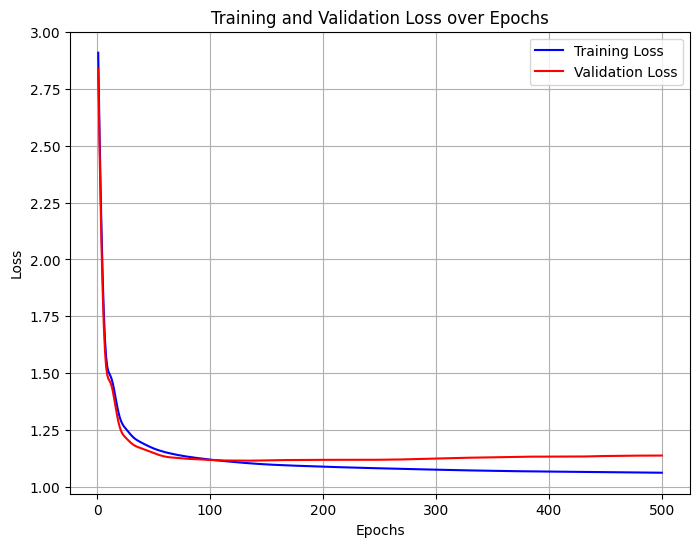

Mean Squared Error (MSE) on Test Data: 1.1373


In [11]:
# Define input and output sizes
input_size = x_train.shape[1]  # Input size based on the number of features
hidden_size1 = 32  # Number of neurons in the first hidden layer
output_size = 2  # Output size (two outputs for home and away goals)

# Initialize the model
model = SoccerPredictionNN1(input_size, hidden_size1, output_size)

# Define the loss function (Mean Squared Error) and optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the neural network
num_epochs = 500
train_losses = []  # Store training losses for plotting
val_losses = []    # Store validation losses for plotting

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the training loss for each epoch
    val_losses.append(val_loss.item())  # Store the validation loss for each epoch

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Get predictions from the trained model
with torch.no_grad():
    model.eval()
    predicted_scores = model(X_test_tensor)

# Calculate Mean Squared Error (MSE)
mse = criterion(predicted_scores, y_test_tensor).item()

print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")